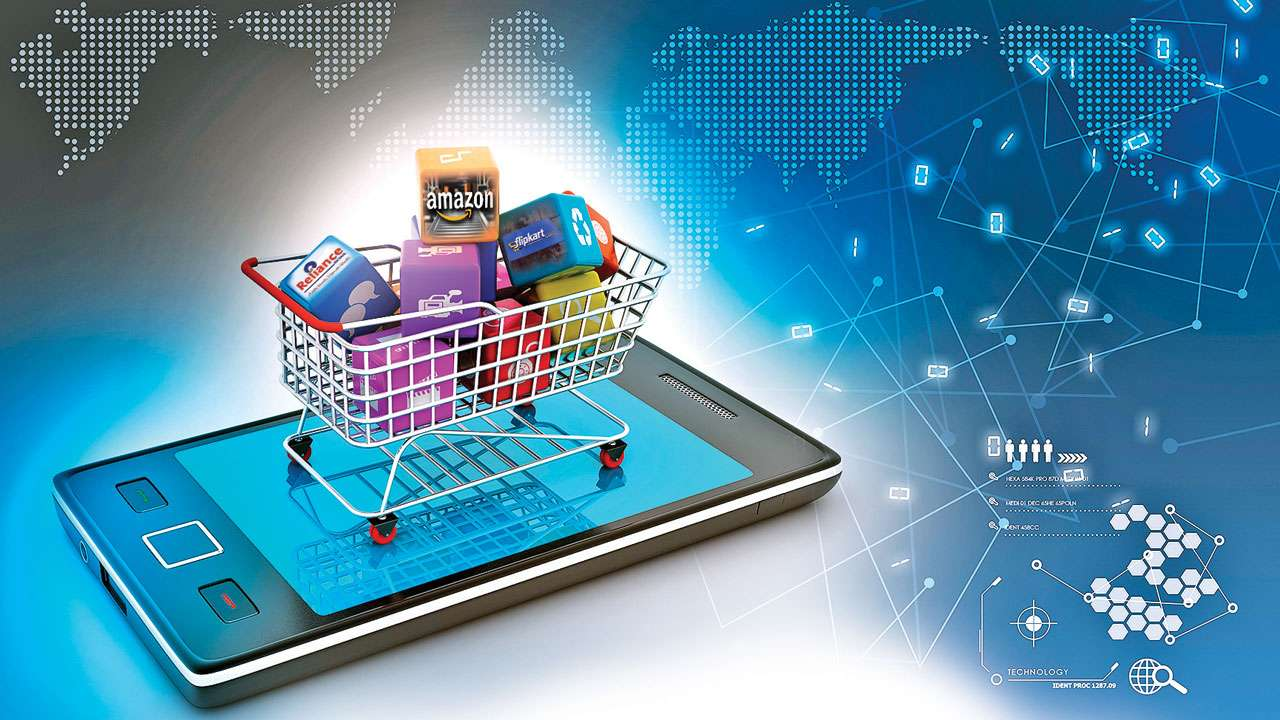

In [1]:
from IPython.display import Image

Image(filename="e-commerce.jpg")

## Importieren und Einlesen

### Importieren von Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings        
import datetime as dt

%matplotlib inline
color = sns.color_palette()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)  

warnings.filterwarnings('ignore')             
warnings.warn("this will not show")

### Einlesen von Daten

In [3]:
df = pd.read_csv('data.csv')
df.head()                    # Die ersten 5 Zeilen lesen

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   InvoiceNo    object 
 1   StockCode    object 
 2   Description  object 
 3   Quantity     float64
 4   InvoiceDate  object 
 5   UnitPrice    float64
 6   CustomerID   float64
 7   Country      object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()    # Descriptive Statistiks

,Quantity,UnitPrice,CustomerID
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [6]:
df.shape             # 541909 Zeile und 8 Spalten

(541909, 8)

<font color='blue'>**Wir erstellen eine Liste, um die Namen der Spalten zu erhalten.**</font> 

In [7]:
columns = list(df.columns)
columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Bereinigung von Daten

### Umgang mit fehlenden Werten

<font color='blue'>**Um Fehlende Werte zu finden, definieren wir ein Funktion**</font> 

In [8]:
def null_values(x):
    a = x.isnull().sum()
    b = 100 * x.isnull().sum()/x.shape[0]
    nv = pd.concat([a, round(b,2)], axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [9]:
null_values(df)

,Missing_Records,Percentage (%)
CustomerID,138727,25.60
Description,7489,1.38
StockCode,6035,1.11
Quantity,6035,1.11
InvoiceDate,6035,1.11
UnitPrice,6035,1.11
Country,6035,1.11


<font color='red'>In den Spalten "Country", "StockCode", "Quantity", "InvoiceDate", "UnitPrice" gibt es die gleiche Anzahl von fehlenden Werte(6035). Sehen wir uns die Daten in der Spalte "Country" unten an.</font> 

In [10]:
null_country = df[df['Country'].isnull()]
null_country.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/1/2010 9:41,2.1,15311,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 10:39,0.42,13408,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",48,12/1/2010 12:27,2.1,16210,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2010 12:43,12.75,14729,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",1,12/1/2010 12:43,2.95,14729,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,"536524,21111,""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",6,12/1/2010 12:51,2.95,17572,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,"536531,22819,""BIRTHDAY CARD, RETRO SPOT"",24,12/1/2010 13:23,0.42,15485,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,"536531,21506,""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 13:23,0.42,15485,United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,"536532,21506,""FANCY FONT BIRTHDAY CARD, "",12,12/1/2010 13:24,0.42,12433,Norway",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,"536540,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN"",6,12/1/2010 14:05,2.55,14911,EIRE",NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='red'>Es scheint, dass die fehlende Werte in der Spalte "Country" auch in den Spalten "StockCode", "Menge", "InvoiceDate", "UnitPrice" leer sind. Da wir nach "country" auswerten werden, löschen wir die Zeilen mit fehlende Werten in der Spalte "Country".</font>

In [11]:
df.dropna(subset = ["Country"], inplace = True)
df.shape                                          # 6035 satir silindi.

(535874, 8)

<font color='red'>Als wir die fehlende Werte in der Spalte "Country" gelöscht haben, haben wir gesehen, dass auch die fehlende Werte in den Spalten StockCode, Menge, InvoiceDate, UnitPrice gelöscht wurden."</font>

In [12]:
null_values(df)

,Missing_Records,Percentage (%)
CustomerID,132692,24.76
Description,1454,0.27


<font color='red'>Die Spalten "CustumerID" und "Description" sind für unsere Analyse wichtig und wir haben keine Möglichkeit, diese Daten logisch auszufüllen. Außerdem haben wir über 500.000 Zeile. Also löschen wir die fehlenden Werte in diesen Spalten. Dann definieren wir einen neuen DataFrame namens "df_neu"</font>

In [13]:
df_neu = df.dropna()
df_neu.shape

(403182, 8)

In [14]:
null_values(df_neu)

,Missing_Records,Percentage (%)


<font color='red'>Wir benennen die Spalte "Beschreibung" in "Produkt" um</font>

In [15]:
df_neu = df_neu.rename(columns={"Description":"Product"})
df_neu.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


<font color='red'>Jetzt keine fehlende Werte</font>

In [16]:
df_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   InvoiceNo    object 
 1   StockCode    object 
 2   Product      object 
 3   Quantity     float64
 4   InvoiceDate  object 
 5   UnitPrice    float64
 6   CustomerID   float64
 7   Country      object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB


### Erkennung von stornierten Bestellungen

<font color='blue'>**Gibt es stornierte Bestellungen?**</font> 

In [17]:
df_neu[df_neu["Quantity"]<0].sort_values(by='CustomerID', ascending=False)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
295686,C562808,23187,FRENCH STYLE STORAGE JAR BONBONS,-5.0,8/9/2011 15:10,0.29,18282.0,United Kingdom
70604,C542086,22423,REGENCY CAKESTAND 3 TIER,-1.0,1/25/2011 12:34,12.75,18277.0,United Kingdom
481908,C577386,23401,RUSTIC MIRROR WITH LACE HEART,-1.0,11/18/2011 16:54,6.25,18276.0,United Kingdom
481921,C577390,23401,RUSTIC MIRROR WITH LACE HEART,-1.0,11/18/2011 17:01,6.25,18276.0,United Kingdom
488519,C577832,22989,SET 2 PANTRY DESIGN TEA TOWELS,-6.0,11/22/2011 10:18,3.25,18274.0,United Kingdom
...,...,...,...,...,...,...,...,...
129741,C547388,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,-12.0,3/22/2011 16:07,1.45,12352.0,Norway
129740,C547388,22701,PINK DOG BOWL,-6.0,3/22/2011 16:07,2.95,12352.0,Norway
129738,C547388,37448,CERAMIC CAKE DESIGN SPOTTED MUG,-12.0,3/22/2011 16:07,1.49,12352.0,Norway
129739,C547388,22784,LANTERN CREAM GAZEBO,-3.0,3/22/2011 16:07,4.95,12352.0,Norway


In [18]:
df_neu[df_neu["CustomerID"]==18276.0]

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
421484,572990,23085,ANTIQUE SILVER BAUBLE LAMP,12.0,10/27/2011 10:54,8.25,18276.0,United Kingdom
421485,572990,22565,FELTCRAFT HAIRBANDS PINK AND WHITE,12.0,10/27/2011 10:54,0.85,18276.0,United Kingdom
421486,572990,22568,FELTCRAFT CUSHION OWL,4.0,10/27/2011 10:54,3.75,18276.0,United Kingdom
421487,572990,20972,PINK CREAM FELT CRAFT TRINKET BOX,12.0,10/27/2011 10:54,1.25,18276.0,United Kingdom
421488,572990,23076,ICE CREAM SUNDAE LIP GLOSS,24.0,10/27/2011 10:54,1.25,18276.0,United Kingdom
421489,572990,23077,DOUGHNUT LIP GLOSS,20.0,10/27/2011 10:54,1.25,18276.0,United Kingdom
421490,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,10/27/2011 10:54,6.25,18276.0,United Kingdom
421491,572990,84946,ANTIQUE SILVER T-LIGHT GLASS,24.0,10/27/2011 10:54,1.25,18276.0,United Kingdom
421492,572990,23348,CHILDRENS TOY COOKING UTENSIL SET,6.0,10/27/2011 10:54,2.08,18276.0,United Kingdom
421493,572990,23241,TREASURE TIN GYMKHANA DESIGN,6.0,10/27/2011 10:54,2.08,18276.0,United Kingdom


In [19]:
df_storn = df_neu[df_neu["Quantity"]<0]

In [20]:
print("Die Anzahl der stornierten Bestellungen beträgt {} und der Prozentsatz ist {}".format(df_storn.shape[0], round(df_storn.shape[0]/df_neu.shape[0]*100,2)))

Die Anzahl der stornierten Bestellungen beträgt 8839 und der Prozentsatz ist 2.19


### Aktualisieren des DataFrame

<font color='red'>Wir löschen alle stornierten Transaktionen aus dem DataFrame </font>

In [21]:
df_neu = df_neu[df_neu["Quantity"]>0]
df_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394343 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   InvoiceNo    object 
 1   StockCode    object 
 2   Product      object 
 3   Quantity     float64
 4   InvoiceDate  object 
 5   UnitPrice    float64
 6   CustomerID   float64
 7   Country      object 
dtypes: float64(3), object(5)
memory usage: 27.1+ MB


## Feature Engineering

### Konvertierung von Datentypen

In [22]:
df_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394343 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   InvoiceNo    object 
 1   StockCode    object 
 2   Product      object 
 3   Quantity     float64
 4   InvoiceDate  object 
 5   UnitPrice    float64
 6   CustomerID   float64
 7   Country      object 
dtypes: float64(3), object(5)
memory usage: 27.1+ MB


<font color='red'>Wir möchten neue Spalten aus der Spalte "InvoiceDate" erstellen. Aber wir sollen zuerst den Datentype(aktuell Objekt) auf "datetime" ändern.</font>

In [23]:
df_neu["InvoiceDate"] = df_neu["InvoiceDate"].astype("datetime64")
df_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394343 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Product      object        
 3   Quantity     float64       
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.1+ MB


### Hinzufügen neuer Spalten

<font color='red'>Aus der Spalte "InvoiceDate" erstellen wir neue Spalten (Year, Month, Day, day_of_week). Auf diese Weise können wir verschiedene Analysen erreichen</font>

In [24]:
df_neu['Year'] = df_neu["InvoiceDate"].dt.year           
df_neu['Month'] = df_neu['InvoiceDate'].dt.month
df_neu['Day'] = df_neu['InvoiceDate'].dt.day

In [25]:
df_neu.insert(loc=11, column='day_of_week', value=(df_neu.InvoiceDate.dt.dayofweek) + 
              1) # Montag=1.....Sonntag=7

In [26]:
df_neu.insert(loc=12, column='year_month', value=df_neu['InvoiceDate'].map(lambda x: 100 * x.year + x.month))

In [27]:
df_neu["Total_Amount"] = df_neu["Quantity"]* df_neu["UnitPrice"]
df_neu.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,day_of_week,year_month,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,3,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,3,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,3,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,3,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,3,201012,20.34


In [28]:
df_neu["Product"] = df_neu["Product"].str.title()

## Explorative Datenanalyse

### Eindeutige Werte

In [30]:
country = df_neu["Country"].nunique()
customer = df_neu["CustomerID"].nunique()
produkte = df_neu["Product"].nunique()

print("Es sind insgesamt ;\n{} verschiedene Länder,\n{} verschiedene Kunden und \n{} verschiedene Produkte".format(country,customer,produkte))

Es sind insgesamt ;
37 verschiedene Länder,
4337 verschiedene Kunden und 
3773 verschiedene Produkte


### Die Länder, die meisten Bestellungen haben

In [31]:
land_best = df_neu[["Country","InvoiceNo"]].groupby("Country").count().sort_values("InvoiceNo",ascending=False).iloc[:15]
land_best1 = land_best.reset_index()
land_best1

,Country,InvoiceNo
0,United Kingdom,351031
1,Germany,8998
2,France,8310
3,EIRE,7182
4,Spain,2465
5,Netherlands,2347
6,Belgium,2022
7,Switzerland,1831
8,Portugal,1457
9,Australia,1177


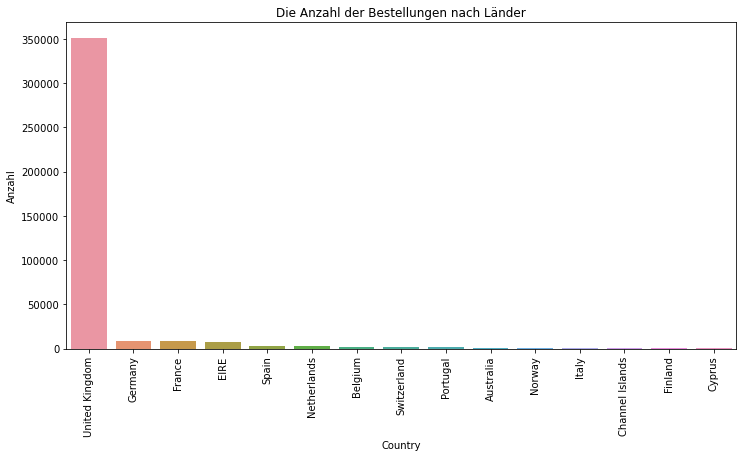

In [32]:
a = land_best1["Country"]
b = land_best1["InvoiceNo"]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(a, b, ax=ax)
ax.set_title("Die Anzahl der Bestellungen nach Länder")
ax.set_ylabel('Anzahl')
ax.set_xticklabels(a, rotation=90);

### Länder mit den höchsten Gesamtausgaben

In [33]:
total_amount=df_neu.groupby(by=['Country'])['Total_Amount'].sum().sort_values(ascending=False).iloc[:25]
df_tot_amount=total_amount.to_frame().reset_index()
df_tot_amount.head()

,Country,Total_Amount
0,United Kingdom,7.095407e+06
1,Netherlands,2.840239e+05
2,EIRE,2.639352e+05
3,Germany,2.279107e+05
4,France,2.086907e+05


### Die meist verkaufte 10 Produkte

In [35]:
verk_prod=df_neu.groupby(by=['Product'])['Quantity'].sum().sort_values(ascending=False).iloc[:10]
df_top_prod=verk_prod.to_frame().reset_index()
df_top_prod.head(10)

,Product,Quantity
0,Medium Ceramic Top Storage Jar,77916.0
1,World War 2 Gliders Asstd Designs,54415.0
2,Jumbo Bag Red Retrospot,46181.0
3,White Hanging Heart T-Light Holder,36725.0
4,Assorted Colour Bird Ornament,35362.0
5,Pack Of 72 Retrospot Cake Cases,33693.0
6,Popcorn Holder,30931.0
7,Rabbit Night Light,27202.0
8,Mini Paint Set Vintage,26076.0
9,Pack Of 12 London Tissues,25345.0


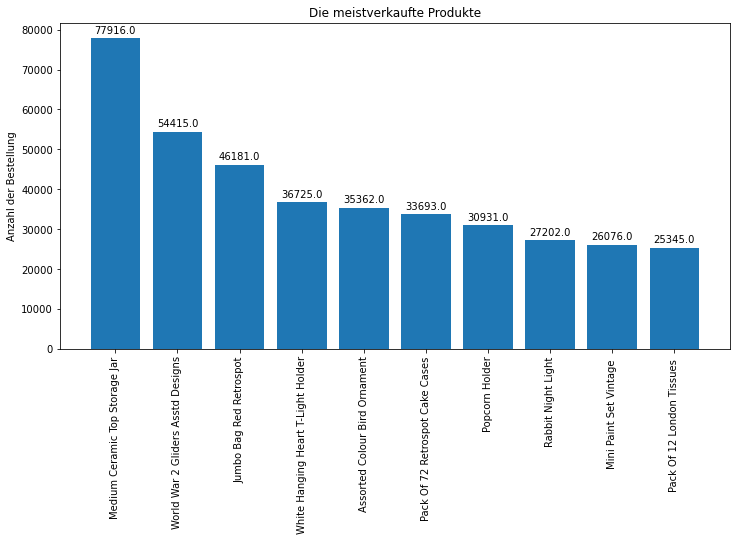

In [36]:
x = df_top_prod["Product"]
y = df_top_prod["Quantity"]

fig, ax = plt.subplots(figsize=(12, 6))
rects1=ax.bar(x,y)
ax.set_title("Die meistverkaufte Produkte")
ax.set_ylabel('Anzahl der Bestellung')
ax.set_xticklabels(x, rotation=90);

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

### Wie viele Bestellungen durch die Kunden?

In [37]:
Anzahl_invoice = df_neu.groupby("CustomerID")["InvoiceNo"].count().sort_values(ascending=False)

print("""pro Kunde;\n
- maximale Anzahl von Bestellungen\t\t:{}
- minimum Anzahl von Bestellungen\t\t:{}
- durchschnittliche Anzahl der Bestellungen\t:{}
""".format(Anzahl_invoice.iloc[0],Anzahl_invoice.iloc[-1],round(Anzahl_invoice.describe()[1])))

pro Kunde;

- maximale Anzahl von Bestellungen		:7755
- minimum Anzahl von Bestellungen		:1
- durchschnittliche Anzahl der Bestellungen	:91



### Bestellungen nach Monate

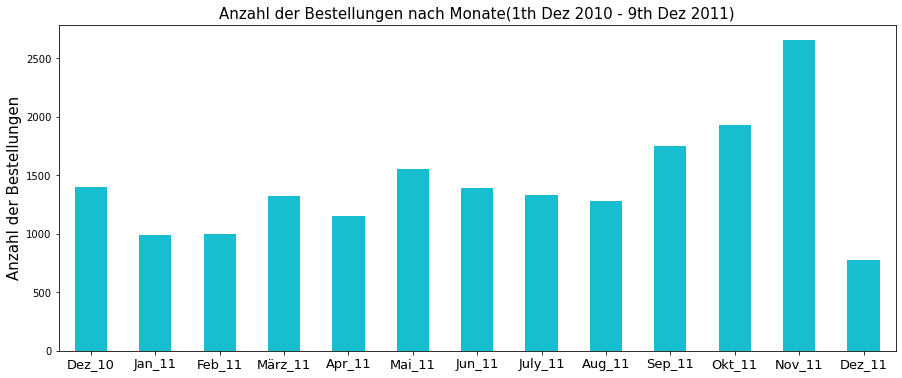

In [38]:
ax = df_neu.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_ylabel('Anzahl der Bestellungen',fontsize=15)
ax.set_title('Anzahl der Bestellungen nach Monate(1th Dez 2010 - 9th Dez 2011)',fontsize=15)
ax.set_xticklabels(('Dez_10','Jan_11','Feb_11','März_11','Apr_11','Mai_11','Jun_11','July_11','Aug_11','Sep_11','Okt_11','Nov_11','Dez_11'), rotation='horizontal', fontsize=13)
plt.show()

### Ausgaben nach Monate

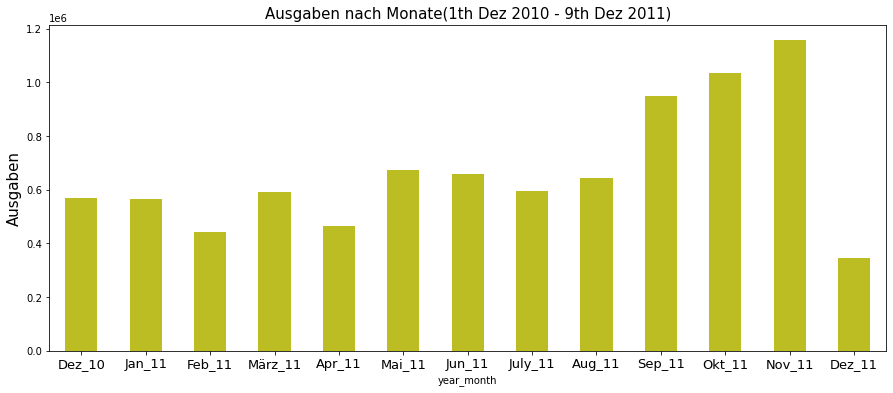

In [39]:
ax1 = df_neu.groupby('year_month')['Total_Amount'].sum().plot(kind='bar',color=color[8],figsize=(15,6))
ax1.set_ylabel('Ausgaben',fontsize=15)
ax1.set_title('Ausgaben nach Monate(1th Dez 2010 - 9th Dez 2011)',fontsize=15)
ax1.set_xticklabels(('Dez_10','Jan_11','Feb_11','März_11','Apr_11','Mai_11','Jun_11','July_11','Aug_11','Sep_11','Okt_11','Nov_11','Dez_11'), rotation='horizontal', fontsize=13)
plt.show()

### Zusammenfassung der Bestellungen und Ausgaben

In [40]:
total_quantity = round(df_neu["Total_Amount"].sum())
max_best = df_neu.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()
best_year_month = df_neu.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

print("Zusammenfassung der Bestellungen und Ausgaben")
print("---------------------------------------------")
print("""Anzahl der Monate\t\t: {}\nTotal Ausgaben\t\t\t: {}\nMonatliche Ausgabe\t\t: {}\nMaximale Ausgabe pro Monat\t: {}\nMaximale Bestellung pro Monat\t: {}
""".format(best_year_month.shape[0],
           total_quantity,
           round(total_quantity/best_year_month.shape[0]),
           round(df_neu.groupby('year_month')['Total_Amount'].sum().max()),
           round(max_best.max())))

Zusammenfassung der Bestellungen und Ausgaben
---------------------------------------------
Anzahl der Monate		: 13
Total Ausgaben			: 8689251
Monatliche Ausgabe		: 668404
Maximale Ausgabe pro Monat	: 1156790
Maximale Bestellung pro Monat	: 2656



### Kunden mit den meisten Ausgaben und ihre Länder

In [41]:
kunden_land = df_neu.groupby(["CustomerID","Country"])[["Total_Amount"]].sum().sort_values(by ="Total_Amount",ascending=False).head(10)
kunden_land

,,Total_Amount
CustomerID,Country,
14646.0,Netherlands,278788.58
18102.0,United Kingdom,259657.30
17450.0,United Kingdom,194550.79
14911.0,EIRE,143260.39
12415.0,Australia,123146.21
14156.0,EIRE,116403.28
17511.0,United Kingdom,90927.50
16029.0,United Kingdom,81024.84
12346.0,United Kingdom,77183.60


### Durchschnittliche Ausgabe pro Bestellung nach Land

In [43]:
durch_Ausgabe = round(df_neu.groupby("Country")[["Total_Amount"]].mean().sort_values(by="Total_Amount",ascending=False)).iloc[:20]
durch_Ausgabe = durch_Ausgabe.reset_index()
print("Durchschnittliche Ausgabe pro Bestellung nach Land :\n\n", durch_Ausgabe)

Durchschnittliche Ausgabe pro Bestellung nach Land :

                  Country  Total_Amount
0            Netherlands         121.0
1                  Japan         117.0
2              Australia         116.0
3              Singapore          96.0
4                 Sweden          85.0
5                Denmark          50.0
6              Lithuania          47.0
7                Lebanon          38.0
8                   EIRE          37.0
9                 Brazil          36.0
10                Norway          34.0
11               Finland          33.0
12        Czech Republic          33.0
13                Greece          33.0
14               Bahrain          32.0
15           Switzerland          31.0
16                Israel          29.0
17  United Arab Emirates          28.0
18       Channel Islands          27.0
19               Austria          26.0


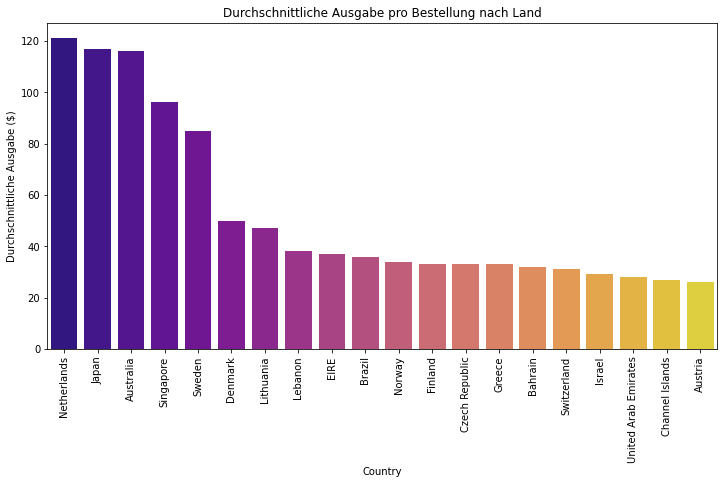

In [44]:
aa = durch_Ausgabe["Country"]
bb = durch_Ausgabe["Total_Amount"]

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_context('notebook')
sns.barplot(aa,bb, palette="plasma")
ax.set_title("Durchschnittliche Ausgabe pro Bestellung nach Land")
ax.set_ylabel('Durchschnittliche Ausgabe ($)')
ax.set_xticklabels(aa, rotation=90);

### Anzahl der Bestellungen nach Tag des Monats

In [45]:
max_best_anzahl = df_neu.groupby("Day")["InvoiceNo"].count().max()

most_day1 = df_neu.groupby("Day")[["InvoiceNo"]].count().reset_index()
most_day_last = most_day1.index[most_day1["InvoiceNo"] == most_day1["InvoiceNo"].max()][0]+1
most_day_last

print("Der meistverkaufte Tag ist der {}. Tag des Monats und die Anzahl der Bestellungen beträgt {}".format(most_day_last, max_best_anzahl))

Der meistverkaufte Tag ist der 6. Tag des Monats und die Anzahl der Bestellungen beträgt 18190


### Anzahl der Bestellungen nach Wochentag

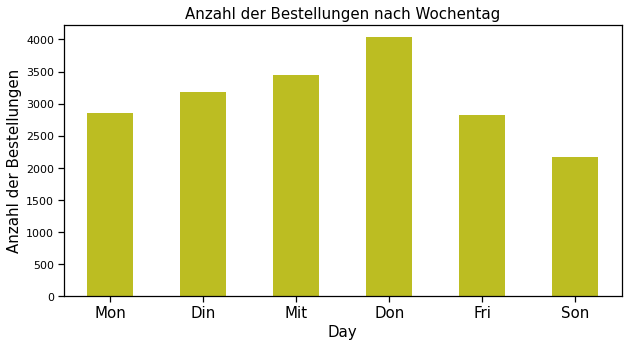

In [46]:
ax = df_neu.groupby('InvoiceNo')['day_of_week'].unique().value_counts().sort_index().plot(kind='bar',color=color[8],figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Anzahl der Bestellungen',fontsize=15)
ax.set_title('Anzahl der Bestellungen nach Wochentag',fontsize=15)
ax.set_xticklabels(('Mon','Din','Mit','Don','Fri','Son',), rotation='horizontal', fontsize=15)
plt.show()